In [11]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv('Customer Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.isnull().sum().sum()

np.int64(0)

In [17]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [20]:
# replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [18]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [24]:
df['customerID'].duplicated().sum()

np.int64(0)

In [25]:
def conv(value):
    if value == 1 :
         return "Yes"
    else:
         return "No"

df['SeniorCitizen'] = df["SeniorCitizen"].apply(conv)    

# converted 0 and 1 values of senior citizen to yes/no t make it easier to understand

In [27]:
df.hd(30)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,No,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes
6,1452-KIOVK,Male,No,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,No,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
8,7892-POOKP,Female,No,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,No,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


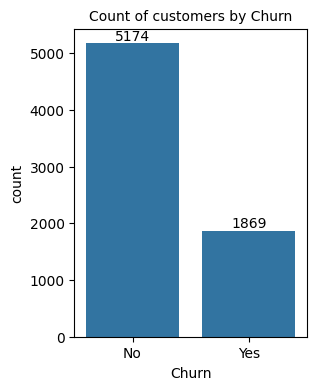

In [35]:
plt.figure(figsize = (3,4))
ax = sns.countplot(x="Churn" , data= df)

ax.bar_label(ax.containers[0])
plt.title("Count of customers by Churn" , fontsize =10)
plt.show()

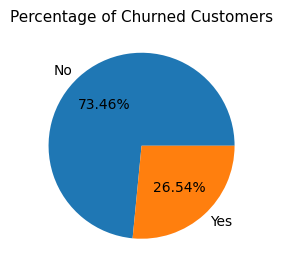

In [36]:
plt.figure(figsize = (3,4))
gb = df.groupby("Churn").agg({'Churn' : 'count'})
gb
plt.pie(gb['Churn'] , labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned Customers", fontsize = 11)
plt.show()

# from the given pie chart we can conclude that 26.4% of our customers have churned out . 
# now lets explore the reason behind it

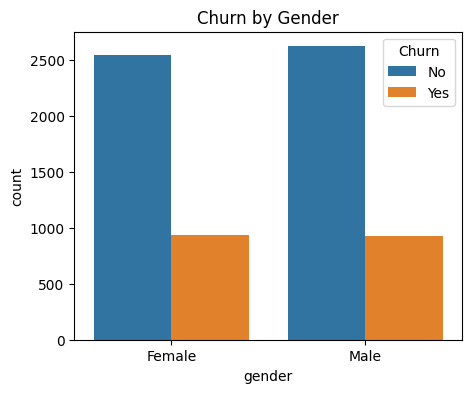

In [50]:
plt.figure(figsize = (5,4))
gr = sns.countplot(x = 'gender', data =df, hue = "Churn")
# gr.bar_label(gr.containers[0])
plt.title("Churn by Gender")
plt.show()

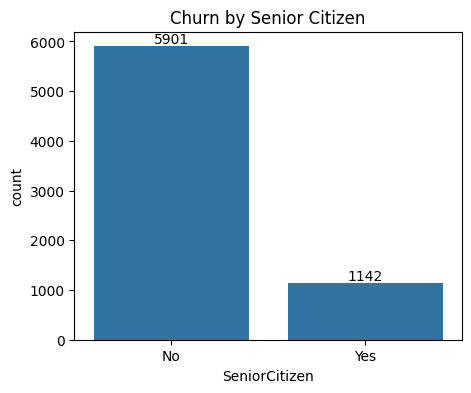

In [52]:
plt.figure(figsize = (5,4))
gr = sns.countplot(x = 'SeniorCitizen', data =df)
gr.bar_label(gr.containers[0])
plt.title("Churn by Senior Citizen")
plt.show()

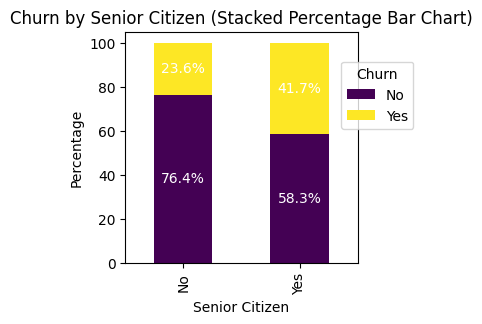

In [59]:
# Calculate percentage values
df_grouped = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()
df_percent = df_grouped.div(df_grouped.sum(axis=1), axis=0) * 100  
# Convert to percentage

# Plot
fig, ax = plt.subplots(figsize=(3, 3))
df_percent.plot(kind='bar', stacked=True, colormap="viridis", ax=ax)

# Add percentage labels
for i, bars in enumerate(ax.containers):
    for bar in bars:
        height = bar.get_height()
        if height > 0:  # Only label non-zero bars
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2, 
                    f'{height:.1f}%', ha='center', va='center', color='white', fontsize=10)

# Titles and Labels
plt.title("Churn by Senior Citizen (Stacked Percentage Bar Chart)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage")
plt.legend(title="Churn",bbox_to_anchor = (0.9,0.9))
plt.show()

# Comprative a greater percentage of people in senior citizen have churned out

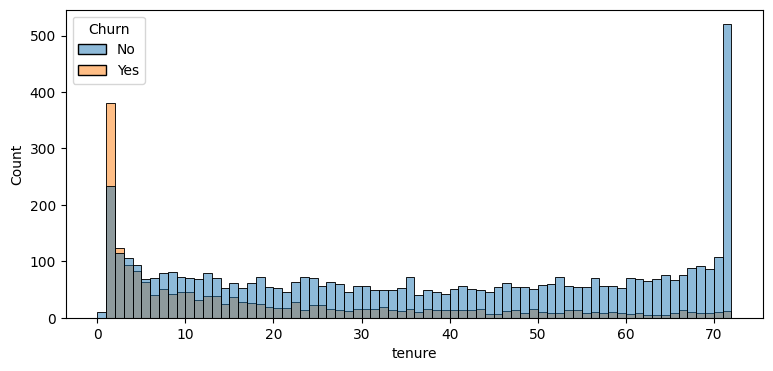

In [65]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72 , hue = "Churn")
plt.show()

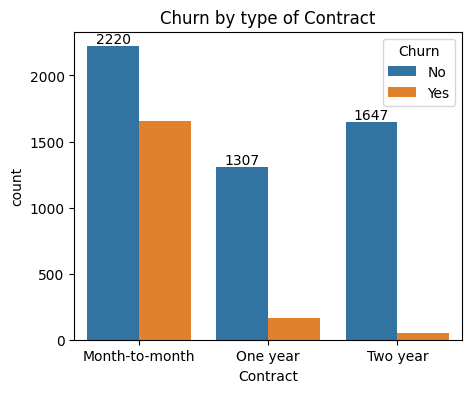

In [67]:
plt.figure(figsize = (5,4))
gr = sns.countplot(x = 'Contract', data =df, hue = "Churn")
gr.bar_label(gr.containers[0])
plt.title("Churn by type of Contract")
plt.show()

In [69]:
# people who have month to month contract are likely to churn then from 
# those who have 1 or 2 years of contract

In [70]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

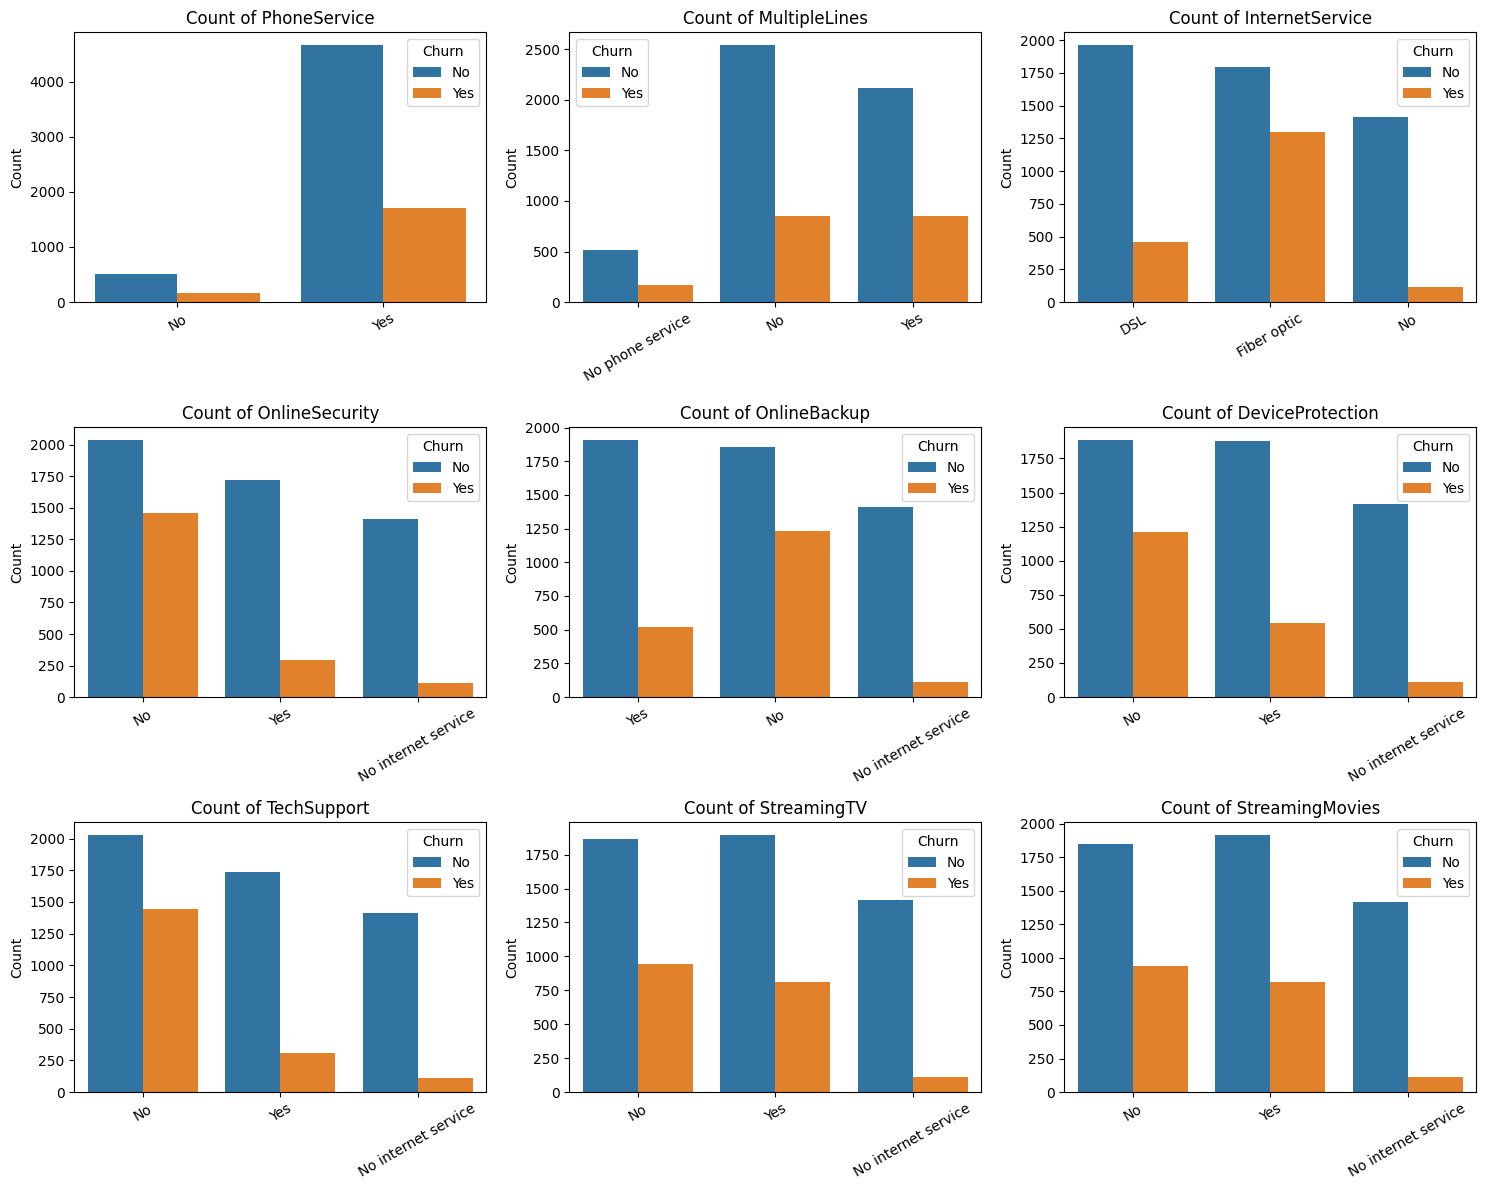

In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

df = pd.read_csv('Customer Churn.csv')

# Define the columns to plot
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))  # 3x3 grid
axes = axes.flatten()  # Flatten axes for easy iteration

# Plot each countplot in a subplot
for i, col in enumerate(columns):
    sns.countplot(x=df[col], ax=axes[i], hue= df["Churn"], legend=True)  
    axes[i].set_title(f"Count of {col}")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Count")
    axes[i].tick_params(axis='x', rotation=30)  # Rotate x labels for better visibility

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [10]:
# This data visualizes customer churn based on various telecom services, with blue bars 
# representing non-churned customers and orange bars representing churned customers.
# Key observations:  
# - Customers without internet services generally have lower churn rates.  
# - Fiber optic users have a higher churn rate compared to DSL users.  
# - Additional services like Online Security, Tech Support, and Streaming seem to 
# influence churn, as customers without these services show higher churn rates.

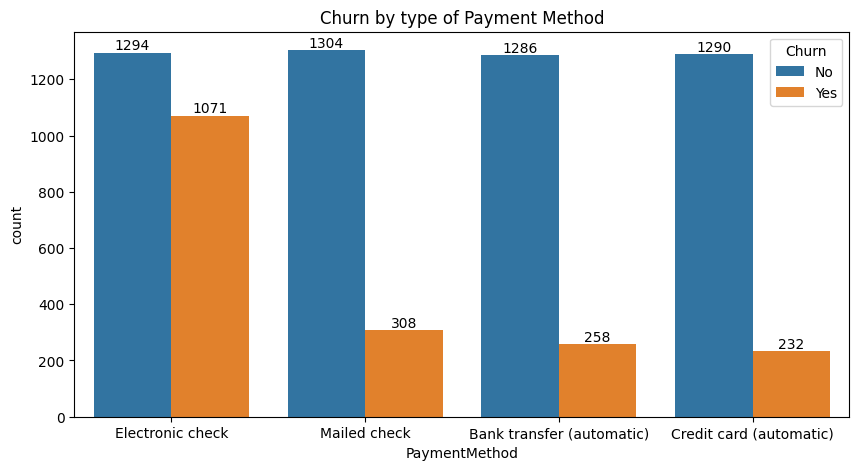

In [16]:
plt.figure(figsize = (10,5))
gr = sns.countplot(x = 'PaymentMethod', data =df, hue = "Churn")
gr.bar_label(gr.containers[0])
gr.bar_label(gr.containers[1])
plt.title("Churn by type of Payment Method")
plt.show()

In [18]:
#  Customers are likely to churn when they are using electonic check as a payment method